# Predictive Analysis of Stock Prices Using ARIMA Model

## Data Used : Axis Bank (2015-2020)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas_datareader

C:\Users\91965\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
import pandas_datareader.data as web

import datetime

axis_bank = web.DataReader("AXISBANK.NS", 'yahoo', datetime.datetime(2015, 1, 1), datetime.datetime(2020, 1, 1))

In [4]:
axis_bank.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-01,504.000000,499.049988,502.649994,503.049988,1351985.0,488.996094
2015-01-02,516.900024,501.700012,503.200012,514.299988,3852825.0,499.931854
2015-01-05,520.400024,515.099976,516.900024,517.549988,2561430.0,503.091003
2015-01-06,513.549988,496.750000,513.549988,499.049988,5284530.0,485.107880
2015-01-07,505.350006,494.500000,498.799988,498.649994,4245189.0,484.719055


# Visualizing the Data

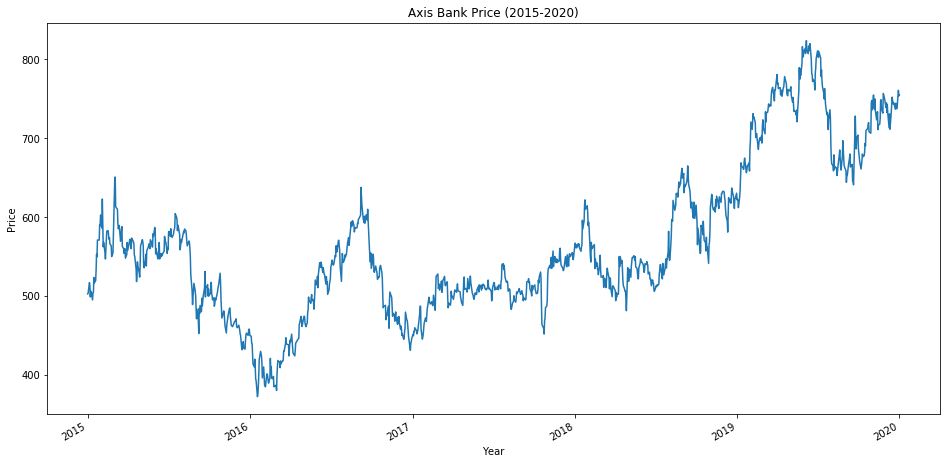

In [5]:
axis_bank['Open'].plot(figsize=(16,8),title='Open Price')
plt.title('Axis Bank Price (2015-2020)')
plt.xlabel('Year')
plt.ylabel('Price');

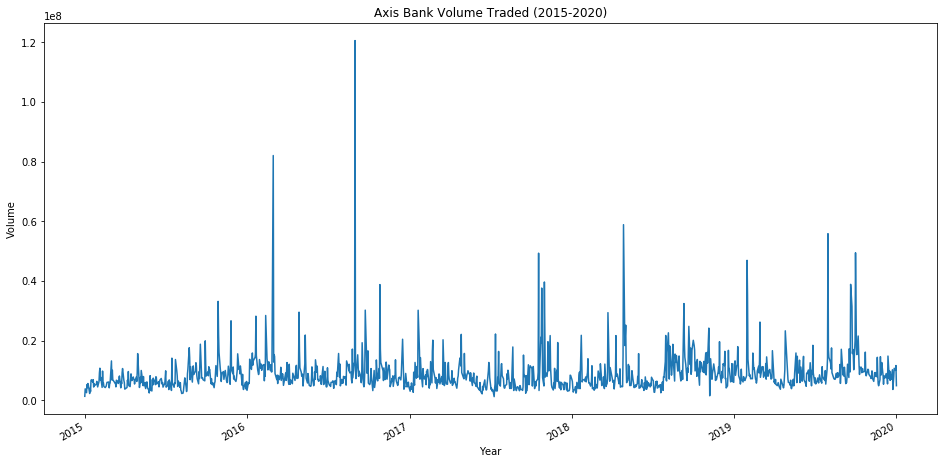

In [6]:
axis_bank['Volume'].plot(figsize=(16,8))
plt.title('Axis Bank Volume Traded (2015-2020)')
plt.xlabel('Year')
plt.ylabel('Volume');

In [7]:
axis_bank['Volume'].argmax()

410

## Daily Percentage Change

In [8]:
axis_bank['returns'] = (axis_bank['Close'] / axis_bank['Close'].shift(1) ) - 1

In [9]:
axis_bank.head()

,High,Low,Open,Close,Volume,Adj Close,returns
Date,,,,,,,
2015-01-01,504.000000,499.049988,502.649994,503.049988,1351985.0,488.996094,NaN
2015-01-02,516.900024,501.700012,503.200012,514.299988,3852825.0,499.931854,0.022364
2015-01-05,520.400024,515.099976,516.900024,517.549988,2561430.0,503.091003,0.006319
2015-01-06,513.549988,496.750000,513.549988,499.049988,5284530.0,485.107880,-0.035745
2015-01-07,505.350006,494.500000,498.799988,498.649994,4245189.0,484.719055,-0.000802


In [10]:
axis_bank['Cumulative Return'] = (1 + axis_bank['returns']).cumprod()

In [11]:
axis_bank.head()

,High,Low,Open,Close,Volume,Adj Close,returns,Cumulative Return
Date,,,,,,,,
2015-01-01,504.000000,499.049988,502.649994,503.049988,1351985.0,488.996094,NaN,NaN
2015-01-02,516.900024,501.700012,503.200012,514.299988,3852825.0,499.931854,0.022364,1.022364
2015-01-05,520.400024,515.099976,516.900024,517.549988,2561430.0,503.091003,0.006319,1.028824
2015-01-06,513.549988,496.750000,513.549988,499.049988,5284530.0,485.107880,-0.035745,0.992049
2015-01-07,505.350006,494.500000,498.799988,498.649994,4245189.0,484.719055,-0.000802,0.991253


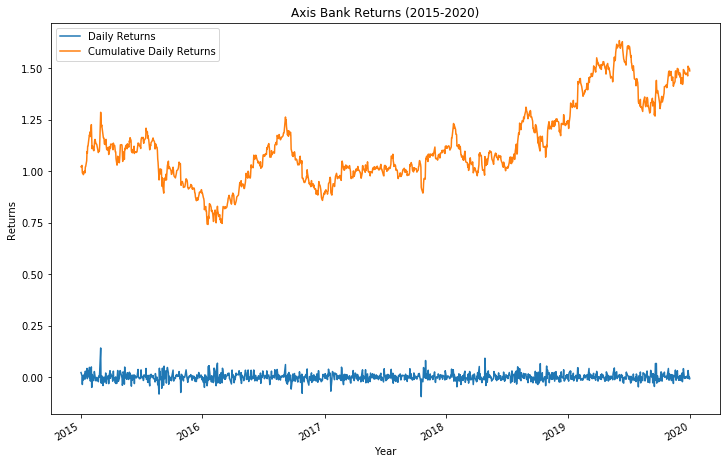

In [12]:
axis_bank['returns'].plot(figsize = (12,8), label = 'Daily Returns')
axis_bank['Cumulative Return'].plot(label = 'Cumulative Daily Returns')
plt.title('Axis Bank Returns (2015-2020)')
plt.xlabel('Year')
plt.ylabel('Returns')
plt.legend();

# Using ARIMA MODEL to Predict Stock Prices 

In [13]:
import statsmodels.api as sm

In [14]:
axis_bank = web.DataReader("AXISBANK.NS", 'yahoo', datetime.datetime(2015, 1, 1), datetime.datetime(2020, 1, 1))

In [15]:
axis_bank.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-01,504.000000,499.049988,502.649994,503.049988,1351985.0,488.996094
2015-01-02,516.900024,501.700012,503.200012,514.299988,3852825.0,499.931854
2015-01-05,520.400024,515.099976,516.900024,517.549988,2561430.0,503.091003
2015-01-06,513.549988,496.750000,513.549988,499.049988,5284530.0,485.107880
2015-01-07,505.350006,494.500000,498.799988,498.649994,4245189.0,484.719055


In [16]:
df = pd.DataFrame(axis_bank['Close'])
df.head()

,Close
Date,
2015-01-01,503.049988
2015-01-02,514.299988
2015-01-05,517.549988
2015-01-06,499.049988
2015-01-07,498.649994


In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Close,1229.0,563.792556,96.33517,373.200012,502.649994,541.650024,613.099976,822.799988


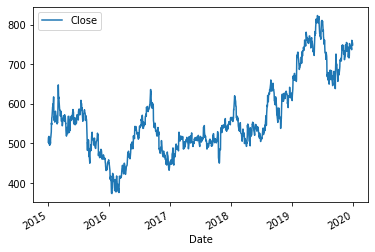

In [18]:
df.plot();

In [19]:
timeseries = df['Close']

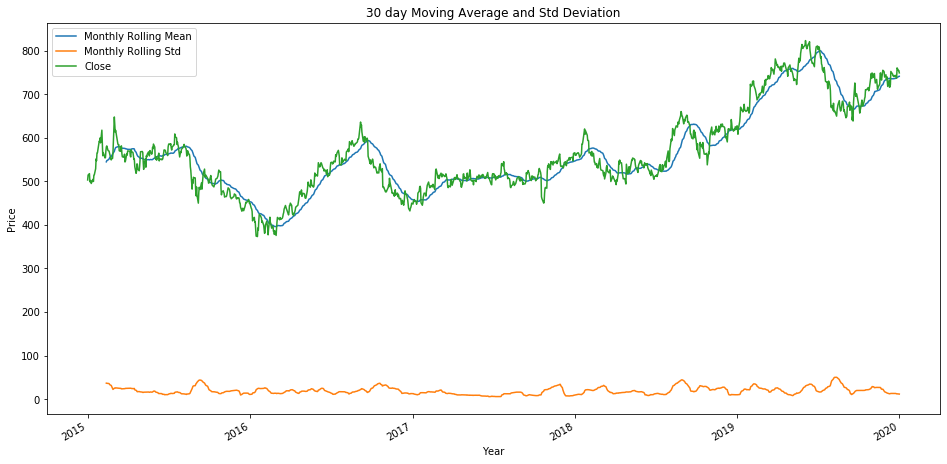

In [20]:
timeseries.rolling(30).mean().plot(label='Monthly Rolling Mean')
timeseries.rolling(30).std().plot(label='Monthly Rolling Std')
timeseries.plot(figsize = (16,8))
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('30 day Moving Average and Std Deviation')
plt.legend();

## Decomposition

ETS decomposition allows us to see the individual parts!

C:\Users\91965\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


<Figure size 432x288 with 0 Axes>

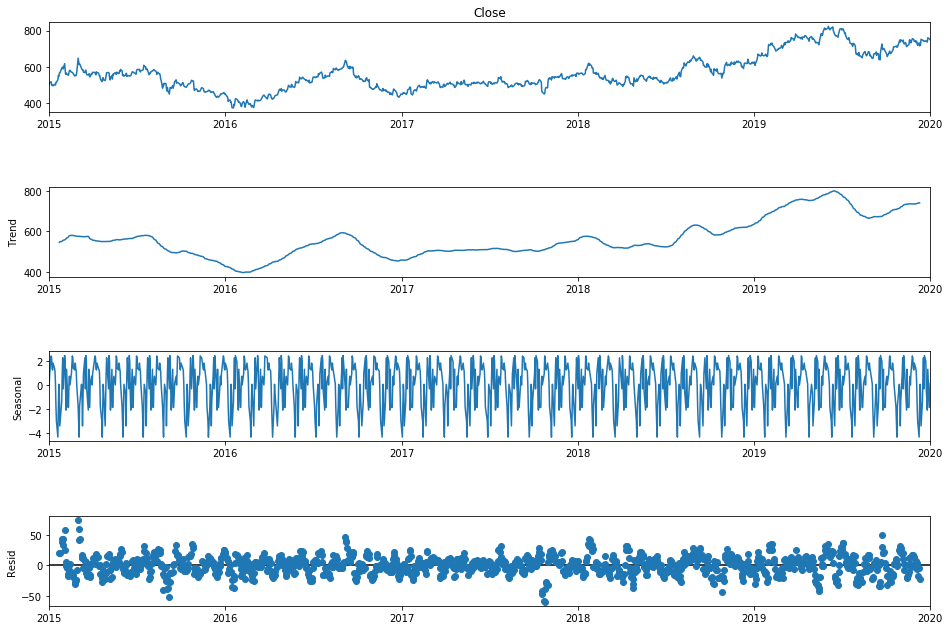

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Close'], freq=30)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 10);

## Testing for Stationarity

We can use the Augmented [Dickey-Fuller](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test) [unit root test](https://en.wikipedia.org/wiki/Unit_root_test).

In statistics and econometrics, an augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity.

Basically, we are trying to whether to accept the Null Hypothesis **H0** (that the time series has a unit root, indicating it is non-stationary) or reject **H0** and go with the Alternative Hypothesis (that the time series has no unit root and is stationary).

We end up deciding this based on the p-value return.

* A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.

* A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.

Let's run the Augmented Dickey-Fuller test on our data:

In [22]:
df.head()

,Close
Date,
2015-01-01,503.049988
2015-01-02,514.299988
2015-01-05,517.549988
2015-01-06,499.049988
2015-01-07,498.649994


In [23]:
from statsmodels.tsa.stattools import adfuller

In [24]:
result = adfuller(df['Close'])

In [25]:
# Store in a function for later use!
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [26]:
adf_check(df['Close'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.5165437986392
p-value : 0.5253120629156499
#Lags Used : 0
Number of Observations Used : 1228
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Since our data is non-stationary, we will have to make it stationary by differencing

The first difference of a time series is the series of changes from one period to the next. We can do this easily with pandas. You can continue to take the second difference, third difference, and so on until your data is stationary.

In [27]:
df['First Difference'] = df['Close'] - df['Close'].shift(1)

In [28]:
adf_check(df['First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -14.639838038538375
p-value : 3.638758532302867e-27
#Lags Used : 7
Number of Observations Used : 1220
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


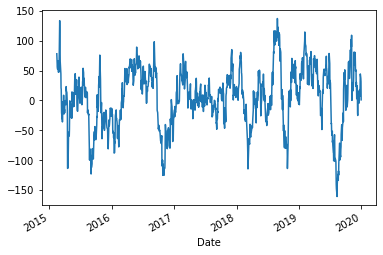

In [50]:
df['Seasonal Difference'] = df['Close'] - df['Close'].shift(30)
df['Seasonal Difference'].plot()

### Now our Data is stationary. We can see the same by plotting the first difference

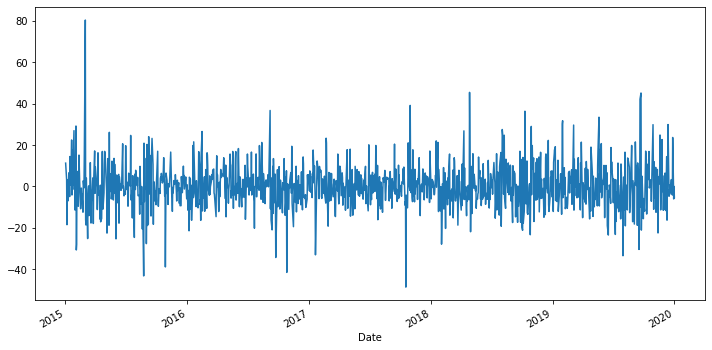

In [29]:
df['First Difference'].plot(figsize = (12,6));

# Autocorrelation and Partial Autocorrelation Plots

An autocorrelation plot (also known as a [Correlogram](https://en.wikipedia.org/wiki/Correlogram) ) shows the correlation of the series with itself, lagged by x time units. So the y axis is the correlation and the x axis is the number of time units of lag.

So imagine taking your time series of length T, copying it, and deleting the first observation of copy #1 and the last observation of copy #2. Now you have two series of length T−1 for which you calculate a correlation coefficient. This is the value of of the vertical axis at x=1x=1 in your plots. It represents the correlation of the series lagged by one time unit. You go on and do this for all possible time lags x and this defines the plot.

You will run these plots on your differenced/stationary data. There is a lot of great information for identifying and interpreting ACF and PACF [here](http://people.duke.edu/~rnau/arimrule.htm) and [here](https://people.duke.edu/~rnau/411arim3.htm).

### Autocorrelation Interpretation

The actual interpretation and how it relates to ARIMA models can get a bit complicated, but there are some basic common methods we can use for the ARIMA model. Our main priority here is to try to figure out whether we will use the AR or MA components for the ARIMA model (or both!) as well as how many lags we should use. In general you would use either AR or MA, using both is less common.

* If the autocorrelation plot shows positive autocorrelation at the first lag (lag-1), then it suggests to use the AR terms in relation to the lag

* If the autocorrelation plot shows negative autocorrelation at the first lag, then it suggests using MA terms.

In [30]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

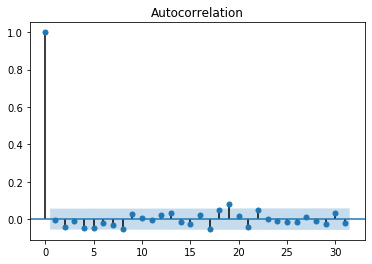

In [31]:
fig_first = plot_acf(df["First Difference"].dropna())

## Partial Autocorrelation

In general, a partial correlation is a conditional correlation.

It is the correlation between two variables under the assumption that we know and take into account the values of some other set of variables.

For instance, consider a regression context in which y = response variable and x1, x2, and x3 are predictor variables.  The partial correlation between y and x3 is the correlation between the variables determined taking into account how both y and x3 are related to x1 and x2.


### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.

### Final ACF and PACF Plots

Let us plot our "final" ACF and PACF plots.

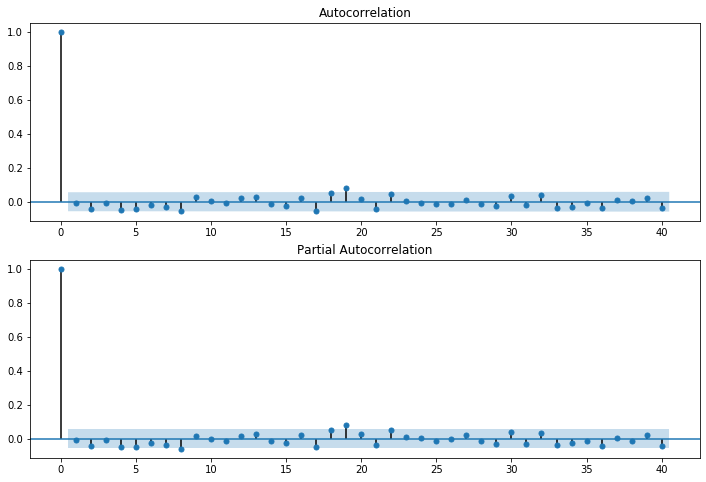

In [32]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['First Difference'].iloc[1:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['First Difference'].iloc[1:], lags=40, ax=ax2)

## Using the Seasonal ARIMA model

Finally we can use our ARIMA model now that we have an understanding of our data!

### p,d,q parameters

* p: The number of lag observations included in the model.
* d: The number of times that the raw observations are differenced, also called the degree of differencing.
* q: The size of the moving average window, also called the order of moving average.

In [74]:
# We have seasonal data!
model = sm.tsa.statespace.SARIMAX(df['Close'],order=(1,1,0),seasonal_order=(1,1,1,30))
results = model.fit()
print(results.summary())

C:\Users\91965\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\91965\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                 1229
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 30)   Log Likelihood               -4587.793
Date:                              Thu, 16 Jul 2020   AIC                           9183.586
Time:                                      23:05:42   BIC                           9203.940
Sample:                                           0   HQIC                          9191.254
                                             - 1229                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0010      0.025      0.039      0.969      -0.048       0.050
ar.S.L30       0.01

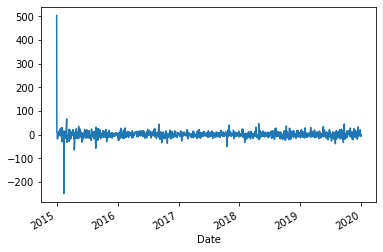

In [75]:
results.resid.plot();

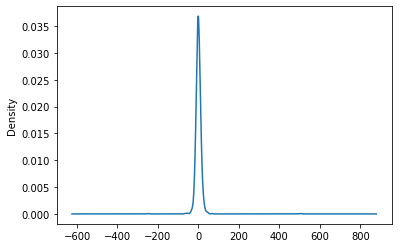

In [76]:
results.resid.plot(kind='kde');

## Prediction of Future Values

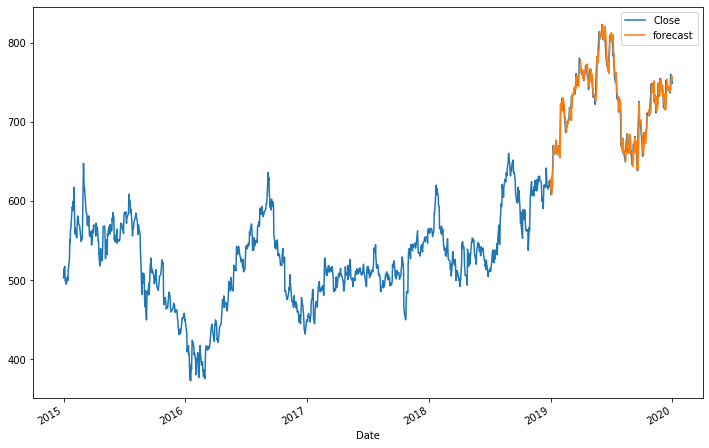

In [78]:
df['forecast'] = results.predict(start = datetime.datetime(2019,1,1), end= datetime.datetime(2020,1,1))  
df[['Close','forecast']].plot(figsize=(12,8))

### Forecasting
This requires more time periods, so let's create them with pandas onto our original dataframe!

In [79]:
df.tail()

,Close,First Difference,forecast,Seasonal Difference
Date,,,,
2019-12-26,736.500000,-4.150024,737.950255,25.299988
2019-12-27,760.150024,23.650024,740.152874,44.250000
2019-12-30,754.099976,-6.050049,758.212354,37.199951
2019-12-31,754.099976,0.000000,755.093160,31.149963
2020-01-01,748.700012,-5.399963,756.156976,0.900024


In [80]:
from pandas.tseries.offsets import DateOffset

In [93]:
future_dates = [df.index[-1] + DateOffset(days=x) for x in range(0,120) ]

In [94]:
future_dates

[Timestamp('2020-01-01 00:00:00'),
 Timestamp('2020-01-02 00:00:00'),
 Timestamp('2020-01-03 00:00:00'),
 Timestamp('2020-01-04 00:00:00'),
 Timestamp('2020-01-05 00:00:00'),
 Timestamp('2020-01-06 00:00:00'),
 Timestamp('2020-01-07 00:00:00'),
 Timestamp('2020-01-08 00:00:00'),
 Timestamp('2020-01-09 00:00:00'),
 Timestamp('2020-01-10 00:00:00'),
 Timestamp('2020-01-11 00:00:00'),
 Timestamp('2020-01-12 00:00:00'),
 Timestamp('2020-01-13 00:00:00'),
 Timestamp('2020-01-14 00:00:00'),
 Timestamp('2020-01-15 00:00:00'),
 Timestamp('2020-01-16 00:00:00'),
 Timestamp('2020-01-17 00:00:00'),
 Timestamp('2020-01-18 00:00:00'),
 Timestamp('2020-01-19 00:00:00'),
 Timestamp('2020-01-20 00:00:00'),
 Timestamp('2020-01-21 00:00:00'),
 Timestamp('2020-01-22 00:00:00'),
 Timestamp('2020-01-23 00:00:00'),
 Timestamp('2020-01-24 00:00:00'),
 Timestamp('2020-01-25 00:00:00'),
 Timestamp('2020-01-26 00:00:00'),
 Timestamp('2020-01-27 00:00:00'),
 Timestamp('2020-01-28 00:00:00'),
 Timestamp('2020-01-

In [95]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [96]:
future_df = pd.concat([df,future_dates_df])

In [155]:
future_df.tail(121)

,Close,First Difference,forecast,Seasonal Difference
2019-12-31,754.099976,0.000000,NaN,31.149963
2020-01-01,748.700012,-5.399963,NaN,0.900024
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-04-25,NaN,NaN,NaN,NaN
2020-04-26,NaN,NaN,NaN,NaN
2020-04-27,NaN,NaN,NaN,NaN
2020-04-28,NaN,NaN,NaN,NaN


In [170]:
model = sm.tsa.statespace.SARIMAX(future_df['Close'],order=(1,1,0),seasonal_order=(1,1,1,30))
results = model.fit()
print(results.summary())

C:\Users\91965\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\91965\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                 1348
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 30)   Log Likelihood               -4587.793
Date:                              Thu, 16 Jul 2020   AIC                           9183.586
Time:                                      23:53:52   BIC                           9204.319
Sample:                                           0   HQIC                          9191.360
                                             - 1348                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0010      0.025      0.039      0.969      -0.048       0.050
ar.S.L30       0.01

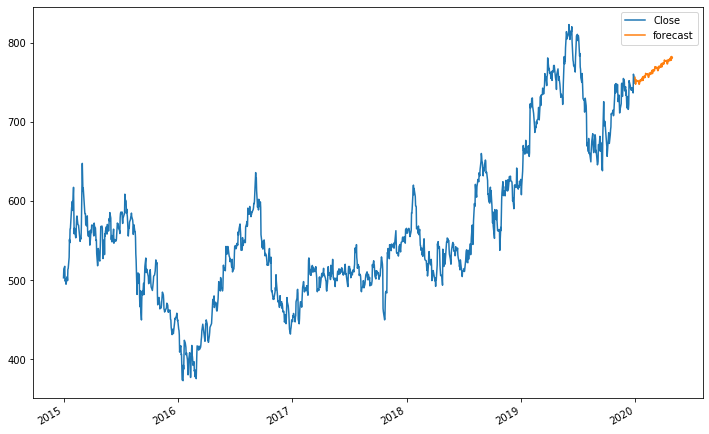

In [175]:
future_df['forecast'] = results.predict(start = datetime.datetime(2020,1,1), end = datetime.datetime(2020,4,29))  
future_df[['Close', 'forecast']].plot(figsize=(12, 8));

In [177]:
future_df.tail(120)

,Close,First Difference,forecast,Seasonal Difference
2020-01-01,748.700012,-5.399963,756.156946,0.900024
2020-01-02,NaN,NaN,749.530652,NaN
2020-01-03,NaN,NaN,747.468311,NaN
2020-01-04,NaN,NaN,749.280842,NaN
2020-01-05,NaN,NaN,753.005046,NaN
...,...,...,...,...
2020-04-25,NaN,NaN,780.169116,NaN
2020-04-26,NaN,NaN,777.791500,NaN
2020-04-27,NaN,NaN,782.504451,NaN
2020-04-28,NaN,NaN,780.266790,NaN


### Hence, we have predicted the price of next 120 days using ARIMA model

# Thank You!